In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm

In [27]:
rawdata=[]
for line in open('M67_data.txt','r').read().split('\n'):
    rawdata.append(line.split(' '))
print(rawdata[0])
data=[]
for stardata in rawdata[1:]:
    if len(stardata)==len(rawdata[0]):
        data.append(stardata)

ages=[]
age_sigmas=[]
for stardata in data:
    age=float(stardata[-1].split('(')[0])
    sigma=stardata[-1].split('(')[1][:-1]
    if '.' not in sigma:
        sigma=float('0.'+sigma)
    else: sigma=float(sigma)
    ages.append(age)
    age_sigmas.append(sigma)
Xobs=ages
sigma_obs=np.average(age_sigmas)
N=len(ages)
print(np.mean(ages),sigma_obs)

['EPIC_ID', 'WOCS_ID', 'Class', 'Î½max', 'âˆ†Î½', 'Teff/K', 'Rsc', 'Msc', 'log_gsc', 'Rcorr', 'Mcorr', 'Rgrid', 'Mgrid', 'log_ggrid', 'Agegrid']
4.787096774193548 1.5612903225806454


In [32]:
#hyperprior
Mu=4
del_mu=40
Sigma=0.5
del_sigma=5

#HMC
model=pm.Model()
with model:
    mu=pm.Lognormal('mu',Mu,del_mu)
    sigma=pm.HalfNormal('sigma',del_sigma)
    
    xtrue = pm.Normal('xtrue', mu, sigma, shape=N)
    xobs = pm.Normal('xobs', xtrue, np.array(age_sigmas), observed=Xobs)

with model:
    trace = pm.sample(tune=10000)

pm.summary(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [xtrue, sigma, mu]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 21000/21000 [00:48<00:00, 434.13draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
xtrue__0,3.961644,0.993501,0.029249,2.040479,5.925029,1033.317264,0.999364
xtrue__1,4.283032,1.120209,0.038635,2.247811,6.654769,721.776185,0.999103
xtrue__2,3.929724,1.079828,0.031487,1.635550,6.080712,1232.288924,0.999000
xtrue__3,4.528202,1.123459,0.050689,2.413197,6.845487,319.569145,0.999353
xtrue__4,4.120573,1.166806,0.036659,1.744694,6.512007,914.443948,0.999031
xtrue__5,3.704686,0.943943,0.028563,1.666798,5.669256,1225.655600,0.999473
xtrue__6,4.088209,0.996638,0.037717,2.182601,6.341328,551.868627,1.003408
xtrue__7,5.909059,1.549874,0.097891,3.527387,8.906098,127.333607,1.001118
xtrue__8,4.208486,0.555692,0.018930,3.276088,5.341685,766.319029,1.002161
xtrue__9,3.174308,0.785600,0.025281,1.465982,4.599993,819.768976,0.999819


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002DBD5457860>,
      dtype=object)

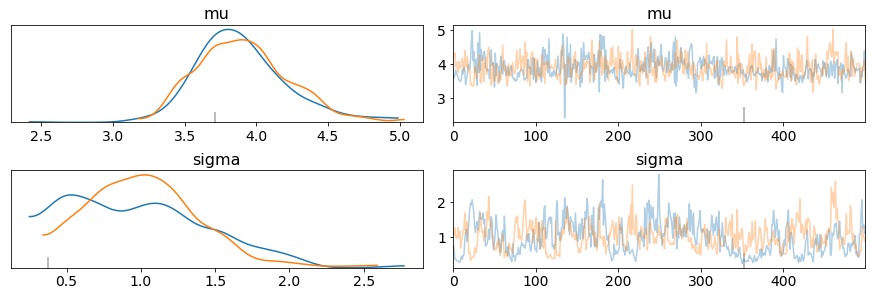

In [33]:
pm.plots.traceplot(trace,var_names=['mu','sigma'])